In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Meek, Mrs. Thomas (Annie Louise Rowley)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
test.shape

(418, 11)

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
survived = train[train['Survived']==1]
not_survived = train[train['Survived']==0]

print('Survived: %i (%.1f%%)'%(len(survived), float(len(survived))/len(train)*100.0))
print('Not_Survived: %i (%.1f%%)'%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print('Total: %i'%len(train))

Survived: 342 (38.4%)
Not_Survived: 549 (61.6%)
Total: 891


In [20]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

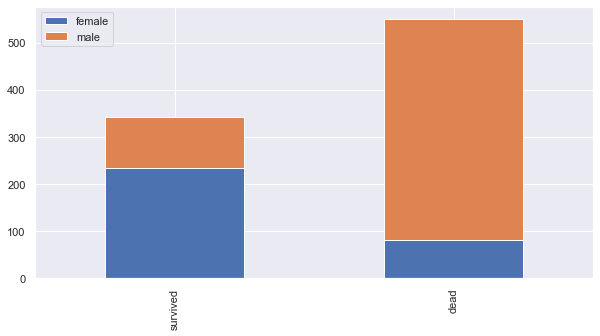

In [22]:
bar_chart('Sex')

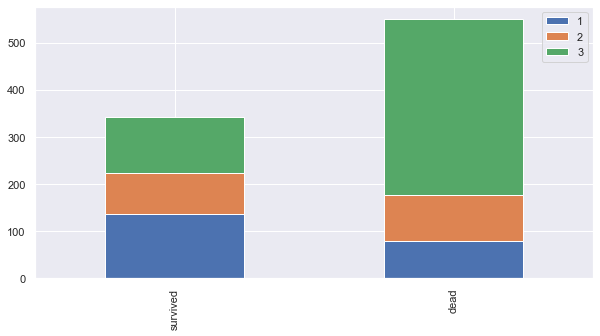

In [23]:
bar_chart('Pclass')

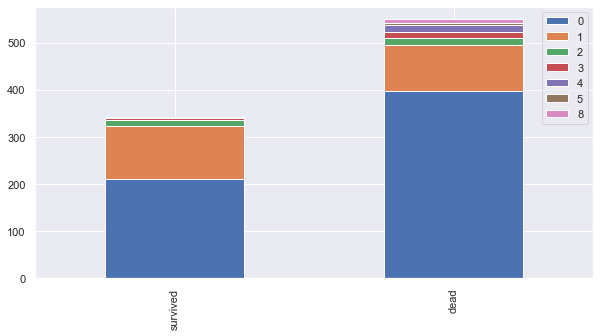

In [24]:
bar_chart('SibSp')

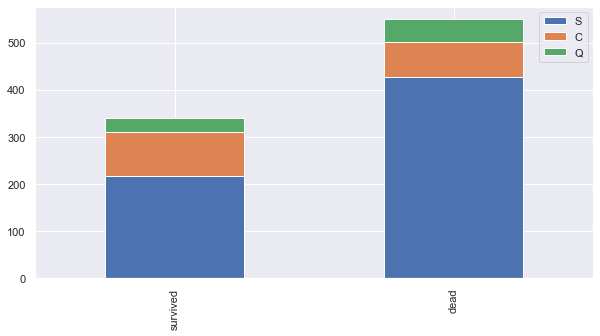

In [25]:
bar_chart('Embarked')

In [26]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [28]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [31]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [40]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [41]:
tab = pd.crosstab(train['Survived'], train['Sex'])
print(tab)

Sex       female  male
Survived              
0             81   468
1            233   109


Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


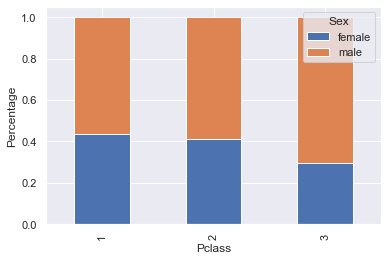

In [32]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.show()

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
train.shape, test.shape

((891, 12), (418, 11))

In [44]:
train_test_data =  [train,test] # combining train nand test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [45]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [46]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Mme           1
Sir           1
Jonkheer      1
Countess      1
Capt          1
Don           1
Lady          1
Name: Title, dtype: int64

In [47]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [48]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [50]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',
                                                 'Don','Dr','Jonkheer','Major',
                                                 'Rev','Sir','Dona'], 'Other')   
    
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [51]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,3,20


In [52]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [53]:
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [54]:
test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [55]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Other':5})

train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,3


In [56]:
train['Title'].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [57]:
test['Title'].value_counts()

1    240
2     79
3     72
4     21
5      6
Name: Title, dtype: int64

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [60]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------   

In [61]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [62]:
train_test_data = [train,test]

In [63]:
train.shape, test.shape

((891, 12), (418, 11))

In [64]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1}).astype(int)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


In [65]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [66]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [67]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.728395
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.030039
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [71]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

print(train.head(), train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 80.2+ KB
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599 

In [72]:
train.Age.value_counts()

30.00    144
21.00     60
35.00     35
24.00     30
22.00     27
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 90, dtype: int64

In [73]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] =0
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] =1
    dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] =2
    dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] =3
    dataset.loc[ dataset['Age'] > 62, 'Age'] =4
    dataset['Age'] = dataset['Age'].astype(int)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,1


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(1), int32(2), int64(6), object(3)
memory usage: 76.7+ KB


In [76]:
train.Age.value_counts()

2    336
1    255
3    181
0    104
4     15
Name: Age, dtype: int64

In [77]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,1


In [79]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

train.head()

In [82]:
train.Embarked.unique()

array([0, 1, 2])

In [83]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int32  
 11  Title        891 non-null    int64  
dtypes: float64(1), int32(3), int64(6), object(2)
memory usage: 73.2+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [84]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
E101           3
              ..
B30            1
D7             1
C106           1
A20            1
C82            1
Name: Cabin, Length: 147, dtype: int64

In [87]:
dataset['Cabin'].str[:1]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [88]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [89]:
dataset['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [91]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass1

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

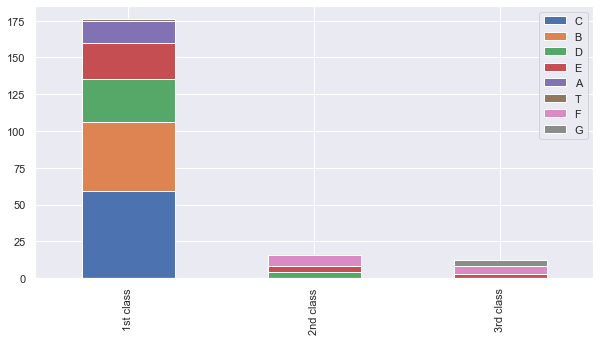

In [92]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3]) 
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize=(10,5))
plt.show()

In [93]:
test.Cabin.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [94]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [95]:
cabin_mapping = {'A':0,
                 'B':0.4,
                 'C':0.8,
                 'D':1.2,
                 'E':1.6,
                 'F':2,
                 'G':2.4,
                 'T':2.8
                }

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1,3,1,0,PC 17599,71.2833,0.8,1,3
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,1,2,1,0,113803,53.1000,0.8,0,3
4,5,0,3,0,2,0,0,373450,8.0500,NaN,0,1


In [96]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

print(train.head())
print('-'*100)
print(test.head())

   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0    1      1      0         A/5 21171   
1            2         1       1    1    3      1      0          PC 17599   
2            3         1       3    1    1      0      0  STON/O2. 3101282   
3            4         1       1    1    2      1      0            113803   
4            5         0       3    0    2      0      0            373450   

      Fare  Cabin  Embarked  Title  
0   7.2500    2.0         0      1  
1  71.2833    0.8         1      3  
2   7.9250    2.0         0      2  
3  53.1000    0.8         0      3  
4   8.0500    2.0         0      1  
----------------------------------------------------------------------------------------------------
   PassengerId  Pclass  Sex  Age  SibSp  Parch   Ticket     Fare  Cabin  \
0          892       3    0    2      0      0   330911   7.8292    2.0   
1          893       3    1    3      1      0   363272   

In [97]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int32  
 11  Title        891 non-null    int64  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 73.2+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [98]:
test['Fare'].fillna(test.groupby(['Pclass','Cabin'])['Fare'].transform('median'), inplace=True)

In [99]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int32  
 11  Title        891 non-null    int64  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 73.2+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [100]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1

print(train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [101]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0 
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1

train[['IsAlone','Survived']].groupby(['IsAlone'], as_index = False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [102]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'IsAlone'],
      dtype='object')

In [103]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,1,1,0,A/5 21171,7.2500,2.0,0,1,2,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,0.8,1,3,2,0
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,2.0,0,2,1,1
3,4,1,1,1,2,1,0,113803,53.1000,0.8,0,3,2,0
4,5,0,3,0,2,0,0,373450,8.0500,2.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2,0,0,211536,13.0000,1.8,0,5,1,1
887,888,1,1,1,1,0,0,112053,30.0000,0.4,0,2,1,1
888,889,0,3,1,1,1,2,W./C. 6607,23.4500,2.0,0,2,4,0
889,890,1,1,0,1,0,0,111369,30.0000,0.8,1,1,1,1


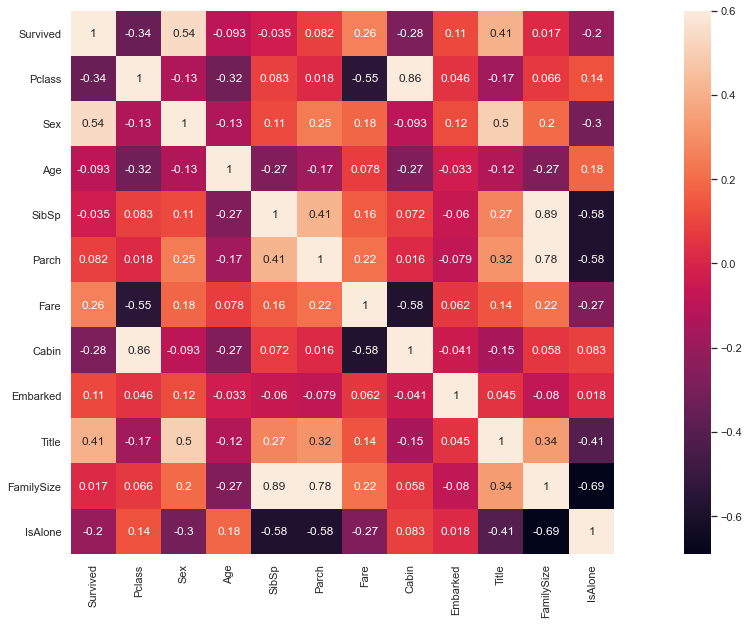

In [104]:
plt.figure(figsize=(25,10))
sns.heatmap(train.drop('PassengerId', axis=1).corr(),vmax=0.6, square=True, annot=True);

In [105]:
train = train.drop(['SibSp', 'Parch','Ticket','FamilySize'], axis=1)
test = test.drop(['SibSp', 'Parch','Ticket','FamilySize'], axis=1)
train_test_data = [train, test]

print(train.info())
print('-'*40)
print(test.info())
print('-'*40)
print(train.head())
print('-'*40)
print(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    float64
 7   Embarked     891 non-null    int32  
 8   Title        891 non-null    int64  
 9   IsAlone      891 non-null    int64  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex    

In [106]:
train['FareBand'] = pd.cut(train['Fare'], 4)
train[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [107]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 128.082, 'Fare'] =0
    dataset.loc[ (dataset['Fare'] > 128.082) & (dataset['Fare'] <= 256.165), 'Fare'] =1
    dataset.loc[ (dataset['Fare'] > 256.165) & (dataset['Fare'] <= 384.247), 'Fare'] =2
    dataset.loc[ dataset['Fare'] > 384.247, 'Fare'] =3
    dataset['Fare'] = dataset['Fare'].astype(int)

train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,FareBand
0,1,0,3,0,1,0,2.0,0,1,0,"(-0.512, 128.082]"
1,2,1,1,1,3,0,0.8,1,3,0,"(-0.512, 128.082]"
2,3,1,3,1,1,0,2.0,0,2,1,"(-0.512, 128.082]"
3,4,1,1,1,2,0,0.8,0,3,0,"(-0.512, 128.082]"
4,5,0,3,0,2,0,2.0,0,1,1,"(-0.512, 128.082]"
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2,0,2.0,0,1,1,"(-0.512, 128.082]"
96,97,0,1,0,4,0,0.0,1,1,1,"(-0.512, 128.082]"
97,98,1,1,0,1,0,1.2,1,1,0,"(-0.512, 128.082]"
98,99,1,2,1,2,0,1.8,0,3,0,"(-0.512, 128.082]"


In [108]:
train = train.drop(['Cabin','FareBand'], axis=1)
test = test.drop(['Cabin'], axis=1)
train_test_data = [train, test]

print(train.info())
print('-'*40)
print(test.info())
print('-'*40)
print(train.head())
print('-'*40)
print(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   Age          891 non-null    int32
 5   Fare         891 non-null    int32
 6   Embarked     891 non-null    int32
 7   Title        891 non-null    int64
 8   IsAlone      891 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 48.9 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int32
 4   Fare        

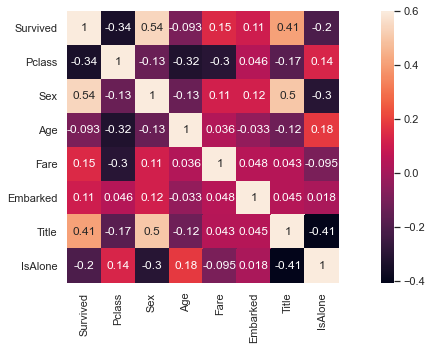

In [109]:
plt.figure(figsize=(15,5))
sns.heatmap(train.drop('PassengerId', axis=1).corr(),vmax=0.6, square=True, annot=True);

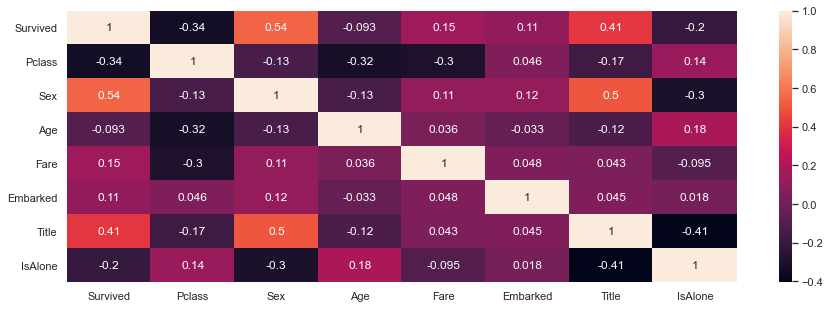

In [111]:
plt.figure(figsize=(15,5))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), annot=True);

In [112]:
print(train.info())
print('-'*40)
print(test.info())
print('-'*40)
print(train.head())
print('-'*40)
print(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   Age          891 non-null    int32
 5   Fare         891 non-null    int32
 6   Embarked     891 non-null    int32
 7   Title        891 non-null    int64
 8   IsAlone      891 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 48.9 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int32
 4   Fare        